In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [21]:
# Cloning Data
data_ = data.copy(deep=True)

In [22]:
# Checking for Duplicate Reviews (ProductID + UserId)
data_[data_.duplicated(['ProductId','UserId'], keep='first') == True].shape[0]

7650

In [23]:
# Droping Duplicate Records . Keeping Only First Occurence
data_.drop_duplicates(['ProductId','UserId'], keep='first', inplace=True)

In [24]:
# Reconfirming Duplicates
data_[data_.duplicated(['ProductId','UserId'], keep='first') == True].shape[0]

0

In [25]:
# Removing Impactless features
data_.drop(['Id','UserId','ProductId','ProfileName','Time'], axis=1, inplace=True)

In [26]:
# Check Missing Value
print('Count : \n',data_.isnull().sum())
print('\nPercentage : \n', data_.isnull().sum() / len(data_))

Count : 
 HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Summary                   27
Text                       0
dtype: int64

Percentage : 
 HelpfulnessNumerator      0.000000
HelpfulnessDenominator    0.000000
Score                     0.000000
Summary                   0.000048
Text                      0.000000
dtype: float64


In [27]:
# Dealing Missing Value at 'Summary'
data_.dropna(axis=0,how='any', inplace=True)
data_.Summary.isnull().sum()

0

In [43]:
data_.Score = data_.Score.map({1:'Negetive', 2:'Negetive', 3:'Neutral', 4:'Positive', 5:'Positive' })
data_

,HelpfulnessNumerator,Score,Summary,Text
0,1,Positive,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,Negetive,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,Positive,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,Negetive,Cough Medicine,If you are looking for the secret ingredient i...
4,0,Positive,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...
568449,0,Positive,Will not do without,Great for sesame chicken..this is a good if no...
568450,0,Negetive,disappointed,I'm disappointed with the flavor. The chocolat...
568451,2,Positive,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,1,Positive,Favorite Training and reward treat,These are the BEST treats for training and rew...


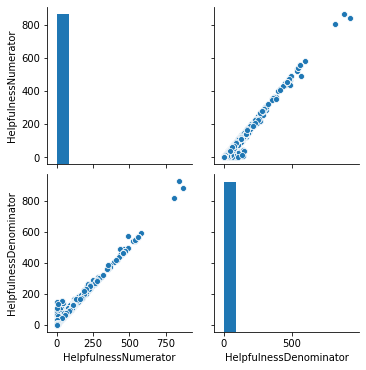

In [12]:
sns.pairplot(data_[['HelpfulnessNumerator', 'HelpfulnessDenominator']])

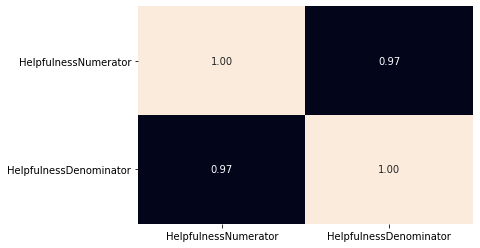

In [13]:
sns.heatmap(data_.corr(), annot=True, fmt='.2f', cbar=False)
plt.show()

In [28]:
data_.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,560777.000000,560777.000000,560777.000000
mean,1.743156,2.224328,4.183178
std,7.666544,8.314773,1.310479
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,1.000000,5.000000
75%,2.000000,2.000000,5.000000
max,866.000000,923.000000,5.000000


In [29]:
data_.drop('HelpfulnessDenominator', axis=1, inplace=True)

In [30]:
data_

,HelpfulnessNumerator,Score,Summary,Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...
568449,0,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,0,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


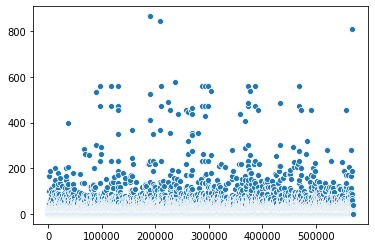

In [17]:
sns.scatterplot(data=data_['HelpfulnessNumerator'])
plt.show()

In [31]:
percentile_99th = np.percentile(a=data_.HelpfulnessNumerator,q=99.05)
data_.HelpfulnessNumerator[data_.HelpfulnessNumerator > percentile_99th] = percentile_99th

C:\Users\Hasher\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


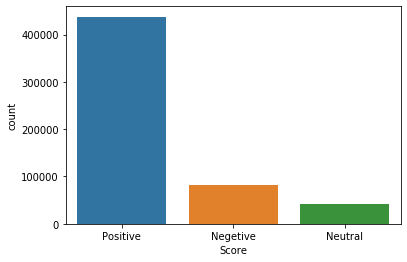

In [44]:
sns.countplot(data=data_, x='Score')
plt.show()

In [68]:
df = data_.sample(frac=0.7, replace=False, random_state=10)

In [69]:
df.Score.value_counts()

Positive    306655
Negetive     56530
Neutral      29359
Name: Score, dtype: int64

In [70]:
Y = df.Score
X = df[['HelpfulnessNumerator','Summary']]
print('X.Shape ', X.shape)
print('Y.Shape ', Y.shape)

X.Shape  (392544, 2)
Y.Shape  (392544,)


In [106]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y ,test_size=0.10, random_state=42)
print('X_Train.Shape ', X_Train.shape)
print('X_Test.Shape ', X_Test.shape)
print('Y_Train.Shape ', Y_Train.shape)
print('Y_Test.Shape ', Y_Test.shape)

X_Train.Shape  (353289, 2)
X_Test.Shape  (39255, 2)
Y_Train.Shape  (353289,)
Y_Test.Shape  (39255,)


In [72]:
X_Train

,HelpfulnessNumerator,Summary
42774,0,It is Dark Chocolate and therefore its a fine ...
39243,0,decent tea
488149,0,Senseo Sumatra Blend
536514,2,Good flavor - beats Jeremiah Fogbuster
416689,1,"Not as Good as Mapleine Flavor, Crescent Brand"
...,...,...
553751,0,Should not be sold
57329,1,Great cup of coffee
212529,2,Substantial. Delicious.
278041,2,Great Option For Diabetic Cats!


In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ft_array = X_Train.HelpfulnessNumerator.values
scaled_values = scaler.fit_transform(ft_array.reshape(-1,1))
X_Train.loc[:,'HelpfulnessNumerator'] = scaled_values


C:\Users\Hasher\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [108]:
X_Train

,HelpfulnessNumerator,Summary
42774,0.00,It is Dark Chocolate and therefore its a fine ...
39243,0.00,decent tea
488149,0.00,Senseo Sumatra Blend
536514,0.10,Good flavor - beats Jeremiah Fogbuster
416689,0.05,"Not as Good as Mapleine Flavor, Crescent Brand"
...,...,...
553751,0.00,Should not be sold
57329,0.05,Great cup of coffee
212529,0.10,Substantial. Delicious.
278041,0.10,Great Option For Diabetic Cats!


In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hasher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hasher\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hasher\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [75]:
cleaned_summary = X_Train.Summary.str.replace('[^A-Za-z\s]', '')

In [55]:
stop_words = stopwords.words('english')
stemer = PorterStemmer()

In [56]:
cleaned_summary

42774     It is Dark Chocolate and therefore its a fine ...
39243                                            decent tea
488149                                 Senseo Sumatra Blend
536514                Good flavor  beats Jeremiah Fogbuster
416689        Not as Good as Mapleine Flavor Crescent Brand
                                ...                        
553751                                   Should not be sold
57329                                   Great cup of coffee
212529                                Substantial Delicious
278041                       Great Option For Diabetic Cats
505501           Great dog food Palatable  good ingredients
Name: Summary, Length: 353289, dtype: object

In [76]:
cleaned_summary = [' '.join([stemer.stem(tokens.lower()) for tokens in review_tokens.split(' ') if len(tokens) > 2 and tokens.lower() not in stop_words]) for review_tokens in cleaned_summary]

In [77]:
cleaned_summary


['dark chocol therefor fine choic',
 'decent tea',
 'senseo sumatra blend',
 'good flavor beat jeremiah fogbust',
 'good maplein flavor crescent brand',
 'perfect waffl',
 'well can puppi food',
 'wolfgang puck coffe vanilla francais',
 'yummi',
 'organ vegan gluten free gravi',
 'expens huge increas price',
 'delici healthier altern fri chip',
 'realli delici',
 'breakfast',
 'excel product',
 'rememb',
 'normal chew gum',
 'good',
 'best hot sauc ever',
 'eagl pack anchovi',
 'rose hip tea',
 'sugarfre honey',
 'love pet',
 'dog love',
 'last resort',
 'cre',
 'fiber tast great',
 'vet tech approv',
 'good',
 'lolivi oliv oil franc',
 'awesom snack',
 'uniqu tast everi one',
 'okay great',
 'crisp refresh',
 'mild coffe',
 'great stuff amaz work',
 'chocol poetri',
 'yummi',
 'wonder coffe go order anoth pound',
 'good flavor fill',
 'outstand product',
 'best',
 'sure drink ovaltin',
 'great tea',
 'milk cocoa coffe peppermint twist',
 'healthi dog treat',
 'best italian oliv oil',


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500, max_df=0.80)
tf_idf_matrix = vectorizer.fit_transform(cleaned_summary)

In [79]:
df2 = pd.DataFrame(tf_idf_matrix.toarray(),columns=vectorizer.get_feature_names())

In [91]:
df2.head()

,absolut,actual,ad,add,addict,addit,advertis,aftertast,allergi,almond,...,worth,would,wow,wrong,ye,year,yet,yuck,yum,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
X_Train.reset_index(inplace=True, drop=True)
X_Train.head()

,HelpfulnessNumerator,Summary
0,0.00,It is Dark Chocolate and therefore its a fine ...
1,0.00,decent tea
2,0.00,Senseo Sumatra Blend
3,0.10,Good flavor - beats Jeremiah Fogbuster
4,0.05,"Not as Good as Mapleine Flavor, Crescent Brand"


In [111]:
X_Train.shape

(353289, 2)

In [112]:

X_Train_New = pd.concat([X_Train,df2],axis=1, ignore_index=True)

In [113]:
X_Train_New.head()

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,0.00,It is Dark Chocolate and therefore its a fine ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,decent tea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,Senseo Sumatra Blend,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.10,Good flavor - beats Jeremiah Fogbuster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.05,"Not as Good as Mapleine Flavor, Crescent Brand",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
X_Train_New.drop(1, True)

,0,2,3,4,5,6,7,8,9,10,...,492,493,494,495,496,497,498,499,500,501
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353284,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353285,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353286,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353287,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(class_weight='bala')
